# Internal Inconsistencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
import data_preperation as dp

countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Croatia': 'HR',  'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'UK'}

abbr_list=list(countries.values())

# load_data = dp.load(countries)
generation_data = dp.generation(countries)

importing Jupyter notebook from data_preperation.ipynb


## 1.1 Calculating net imports/exports based on generation and load data 

In [3]:
def import_export_using_load_gen(load_data,generation_data,abbr_list):

    import_export_data=pd.DataFrame()
    import_export_data[['Day','Month','Year','Time']]=load_data[['Day','Month','Year','Time']]

    # In the following command we calculate net import/export in each time step of each country by subtracting '{country_code}' column of 'load_data' dataframe from '{country_code} - Total' of 'generation_data' dataframe and save the result in '{country_code} - [gen - load]' column of 'import_export_data' dataframe. for example, import_export_data['DE - [gen - load]']=generation_data['DE - Total'] - load_data['DE']. Then we create a new column in the 'import_export_data' dataframe called '{country_code} - import/export' and make that column 'Net Export' if '{country_code} - [gen - load]' is greater than 0 and make the '{country_code} - import/export' column 'Net Import' if '{country_code} - [gen - load]' is equal or lower than 0
    
    for abbr in abbr_list:
        import_export_data[f'{abbr} - [gen - load]']=generation_data[f'{abbr} - Total'] - load_data[f'{abbr}']
        import_export_data.loc[import_export_data[f'{abbr} - [gen - load]']>0, f'{abbr} - import/export']='Net Export'
        import_export_data.loc[import_export_data[f'{abbr} - [gen - load]']<=0, f'{abbr} - import/export']='Net Import'

    return(import_export_data)


## 1.2 Calculating net imports/exports based on cross-border transmission data 

In [4]:
def import_export_using_crossborder(crossborder_data,abbr_list):

    import_export_data=pd.DataFrame()
    import_export_data[['Day','Month','Year','Time']]=crossborder_data[['Day','Month','Year','Time']]
    
# In the following command we copy the '{country_code}' column of 'crossborder_data' dataframe to '{country_code} - [exp - imp]' column of 'import_export_data' dataframe. for example, import_export_data['DE - [exp - imp]']. Then we create a new column in the 'import_export_data' dataframe called '{country_code} - import/export' and make that column 'Net Export' if '{country_code} - [exp - imp]' is greater than 0 and make the '{country_code} - import/export' column 'Net Import' if '{country_code} - [exp - imp]' is equal or lower than 0

    for abbr in abbr_list:
        import_export_data[f'{abbr} - [exp - imp]']=crossborder_data[f'{abbr}']
        import_export_data.loc[import_export_data[f'{abbr} - [exp - imp]']>0, f'{abbr} - import/export']='Net Export'
        import_export_data.loc[import_export_data[f'{abbr} - [exp - imp]']<=0, f'{abbr} - import/export']='Net Import'

    return(import_export_data)

## 1.3 Comparission of net imports/exports based on generation and load data and net imports/exports based on cross-border transmission data

In [5]:
def plot(import_export_using_load_gen,import_export_using_crossborder_data,labels):

    x1=[]
    x2=[]

# In the following command, we take the yearly sum of data in net import based on generation/load and net imported based on cross border transmission data. These two yearly sum arrays are saved in variables 'x1' and 'x2' respectively. Then the graph is drawn using matplotlib.

    for label in labels:
        x1.append(import_export_using_load_gen[f'{label} - [gen - load]'].sum()/1000000) 
        x2.append(import_export_using_crossborder_data[f'{label} - [exp - imp]'].sum()/1000000) 
    
    width = 0.35
    X = np.arange(len(labels))
    plt.figure(figsize=(20,10))
    plt.bar([x-width/2 for x in X],x1,width,color='magenta',edgecolor='black', label='based on generation/load data')
    plt.bar([x+width/2 for x in X],x2,width,color='aqua',edgecolor='black',label='based on cross-border export/import data')
    plt.xlabel('Countries')
    plt.ylabel('Power [TW]')
    plt.title('Comparission of annual net imports/exports based on generation/load & cross-border transmission data')
    plt.xticks(X,labels)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.legend()
    plt.grid()
    plt.show()

## 2.1 Comparission of Generation data between ENTSO-E & Eurostat

In [25]:
def comparission_gen_data(generation_data,countries):
    
    gen_eurostat={}
    gen_entsoe={}
    labels=[]
    eurostat = pd.read_csv('../Data Sources/Eurostat/nrg_bal_peh_1_Data.csv')
    eurostat = eurostat.loc[eurostat['TIME']==2019]
       
    for country,abbr in countries.items():

        if country in eurostat.values:
            labels.append(abbr)
            gen_eurostat.update({f'Eurostat - {abbr}': pd.to_numeric(eurostat.loc[eurostat['GEO'] == country,'Value'].iloc[0])})
            gen_entsoe.update({f'ENTSO-E - {abbr}': generation_data[f'{abbr} - Total'].sum()/1000})
            

    width = 0.35
    x1 = list(gen_entsoe.values())
    x2 = list(gen_eurostat.values())
    X = np.arange(len(labels))
    plt.figure(figsize=(20,10))
    plt.bar([x-width/2 for x in X],x1,width,color='gold',edgecolor='black', label='ENTSO-E data')
    plt.bar([x+width/2 for x in X],x2,width,color='lime',edgecolor='black',label='Eurostat data')
    plt.xlabel('Countries')
    plt.ylabel('Power [GW]')
    plt.title('Comparission of annual electricity generation in ENTSO-E and Eurostat data')
    plt.xticks(X,labels)
    plt.legend()
    plt.grid()
    plt.show()

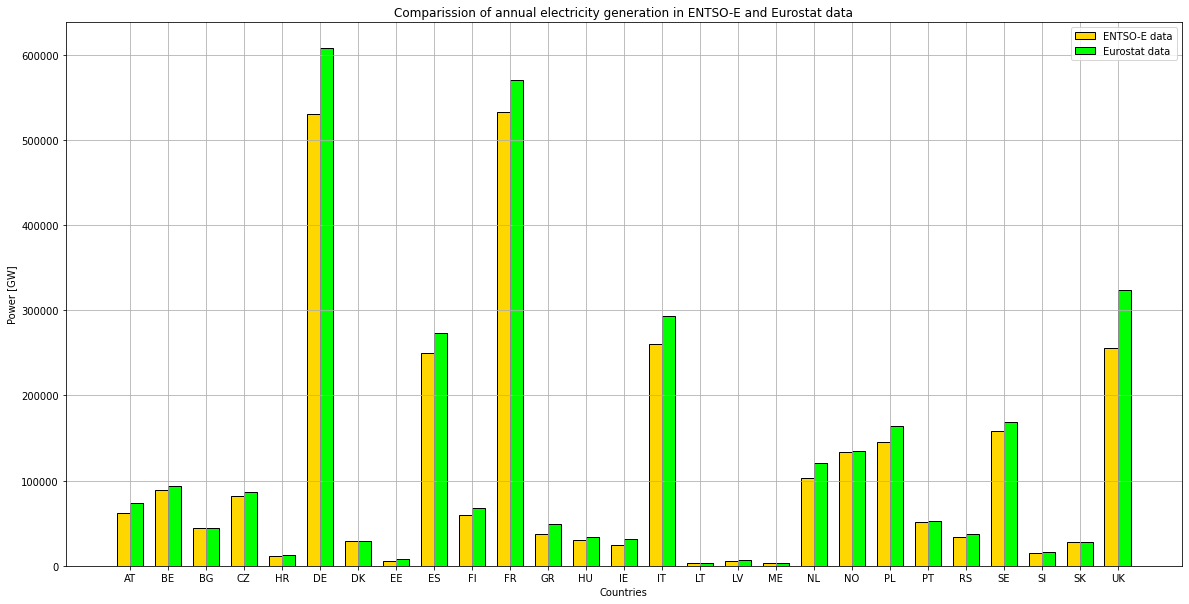

In [26]:
comparission_gen_data(generation_data,countries)